Antes de mais nada, vamos importar os pacotes necessários

In [16]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns

import statsmodels.formula.api as smf

## Introdução

Vamos trabalhar com a base de dados sobre covid vista em sala de aula. Vamos importar a base:

In [2]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
casos = pd.read_csv("https://github.com/jtrecenti/main-cdad2/releases/download/data/casos_covid.csv")
#Excluíndo colunas extras
casos = casos.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [3]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
casos.rename(columns={
  'city':'cidade',
  'city_ibge_code':
  'cod_ibge',
  'last_available_confirmed':'casos',
  'last_available_deaths':'mortes',
  'Sigla da Unidade da Federação':'uf',
  'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)':'pib_milhares_reais',
  'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita',
  'Nome da Grande Região':'regiao'
  }, inplace=True)

Antes de começarmos, relembre as variáveis desta base:

In [4]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cidade              5282 non-null   object 
 1   cod_ibge            5282 non-null   float64
 2   casos               5282 non-null   int64  
 3   mortes              5282 non-null   int64  
 4   regiao              5282 non-null   object 
 5   uf                  5282 non-null   object 
 6   pib_milhares_reais  5282 non-null   float64
 7   pib_per_capita      5282 non-null   float64
 8   nome                5282 non-null   object 
 9   uf                  5282 non-null   object 
 10  totalVotos          5282 non-null   int64  
 11  bolsonaro           5282 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 495.3+ KB


In [5]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
casos.head(5)

,cidade,cod_ibge,casos,mortes,regiao,uf,pib_milhares_reais,pib_per_capita,nome,uf,totalVotos,bolsonaro
0,Acrelândia,1200013.0,1796,37,Norte,AC,253609.712,16623.60,ACRELÂNDIA,AC,6895,0.692676
1,Assis Brasil,1200054.0,1827,24,Norte,AC,93054.149,12546.06,ASSIS BRASIL,AC,4327,0.451814
2,Brasiléia,1200104.0,3000,44,Norte,AC,454802.574,17307.35,BRASILÉIA,AC,12731,0.597596
3,Bujari,1200138.0,1144,17,Norte,AC,157655.612,15357.06,BUJARI,AC,6564,0.630713
4,Capixaba,1200179.0,675,17,Norte,AC,153209.713,13058.02,CAPIXABA,AC,5588,0.623479


## Exercício 1

**1a)** A coluna `casos` mostra o número de casos de covid confirmados, enquanto a coluna `mortes` mostra o número de mortes por covid.
Calcule a correlação entre as duas variáveis e salve abaixo na variável `correlacao`.


In [6]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

correlacao = casos['casos'].corr(casos['mortes'])

print(correlacao)

0.8614765853620766


**1b)** Existe uma correlação estatisticamente significante entre essas duas variáveis? Ou seja, a variação em uma variável está ligada ou ajuda a explicar a variação da outra? Responda "sim" ou "não".

Salve como string na variável `existe_corr`.

In [14]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

corr, p_value_corr = stats.pearsonr(casos['casos'], casos['mortes'])

print(p_value_corr)

existe_corr = 'sim'

0.0


**1c)** Faça um scatterplot que mostre a relação entre as duas variáveis, com `casos` no **eixo x** e `mortes` no **eixo y**.
Salve o gráfico na variável abaixo `plot`.

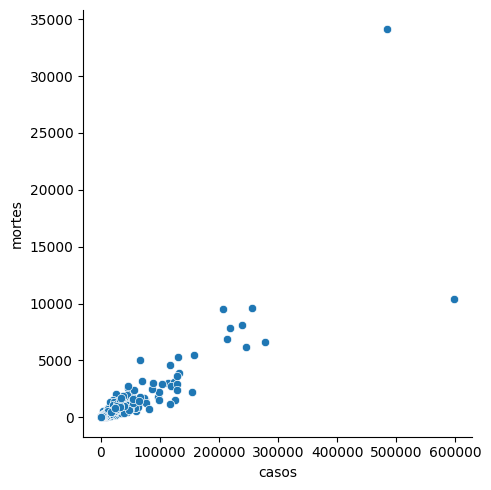

In [18]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

plot = sns.relplot(data=casos, x='casos', y='mortes')

## Exercício 2

**2a)** Faça uma regressão que tenha como única variável independente o número de casos e como variável dependente o número de mortes, chamada `regressao1`.

Em seguida, forneça as duas respostas a seguir:

*   Inspecione o coeficiente de casos e salve o valor na variável `coeficiente`.
*   Inspeciona o valor do intercepto e salve o valor na variável `intercepto`.







In [20]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)


regressao1 = smf.ols(formula='mortes ~ casos', data=casos).fit()

# Obter o coeficiente da variável independente (casos)
coeficiente = regressao1.params['casos']

# Obter o valor do intercepto
intercepto = regressao1.params['Intercept']

print(coeficiente)
print(intercepto)


0.03251399116204476
-28.95208932506425


**2b)** Considere que o p valor do coeficiente de `casos` é **0.001**.

Há significância estatística da variável **casos**?

Responda atribuindo o valor "sim" ou "nao" como string à variável `significancia` abaixo.

In [22]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
p_valor = regressao1.pvalues['casos']

print(p_valor)

significancia = "sim"

0.0


**2c)** Construa agora um segundo modelo de regressão que tenha como variável independente, além da variável `casos`, a variável `bolsonaro`, que indica a proporção de votos que foi para o candidato Bolsonaro nas eleições de 2018 no respectivo município. Salve esse segundo modelo na variável `regressao2`.

In [23]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)

regressao2 = smf.ols(formula='mortes ~ casos + bolsonaro', data=casos).fit()

**2d)** Analisando o R quadrado (ajustado) dos dois modelos, qual deles possui um maior poder de explicação do fenômeno de mortes por covid em cada município?

Responda, atribuindo como string à variável abaixo` melhor_modelo`, uma das três opções:

*   "modelo1" (no caso de regressao1)
*   "modelo2" (no caso de regressao2)
*   "igual" (caso ambos os modelos tenham o mesmo poder de explicação)




In [25]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
# Criando e ajustando o modelo para a primeira regressão

r2_regressao1 = regressao1.rsquared_adj
r2_regressao2 = regressao2.rsquared_adj

# Calculando o R-quadrado
print(r2_regressao1)
print(r2_regressao2)

print(r2_regressao2 > r2_regressao1)

melhor_modelo = "modelo2"

0.74209307036709
0.7424916558880903
True
